In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from farichlib import Algorithms, BoardsGenerator, Augmentator
import matplotlib.pyplot as plt
%matplotlib inline

/home/yana/anaconda3/lib/python3.7/site-packages/uproot3/__init__.py:138: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  FutureWarning
/home/yana/anaconda3/lib/python3.7/site-packages/awkward0/__init__.py:23: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  FutureWarning


In [3]:
import progressbar as pg

In [4]:
b = BoardsGenerator("data/rootfiles/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root")

100% (25137 of 25137) |##################| Elapsed Time: 0:00:07 Time:  0:00:07


In [5]:
b.GenerateBoards(100, n_rings=100)

100% (100 of 100) |######################| Elapsed Time: 0:00:29 Time:  0:00:29


In [6]:
boards, sizes = b.GetBoards()

In [7]:
boards.shape, sizes

((3631362, 5), (100, 100, 16666))

In [8]:
boards = boards.astype(int)

In [9]:
boards[boards[:,-1]==0, 2][:44]

array([15081, 15081, 15081, 15081, 15081, 15081, 15081, 15081, 15081,
       15081, 15081, 15081, 15081, 15081, 15081, 15081, 15081,  7943,
        7943,  7943,  7943,  7943,  7943,  7943,  7943,  7943,  7943,
        7943,  7943,  7943,  7943,  7943,  7943,  7943,  7943,  7943,
        7943,  7943,  7943,  7943,  7943,  6745,  6745,  6745])

In [10]:
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

In [11]:
from sklearn.metrics import average_precision_score

In [12]:
#data = boards[boards[:,-1]==0]
#data = boards
y_test = []
y_pred = []
for n_board in range(100):
    data = boards[boards[:,-1]==n_board]
    y = Algorithms.classic_algo(data, threshold=None, cumulative=1)
    y_test.extend(data[:,-2])
    y_pred.extend(y)
#     print(len(y), len(data[:,-2]))

In [13]:
len(y_test), len(y_pred)

(3631362, 3631362)

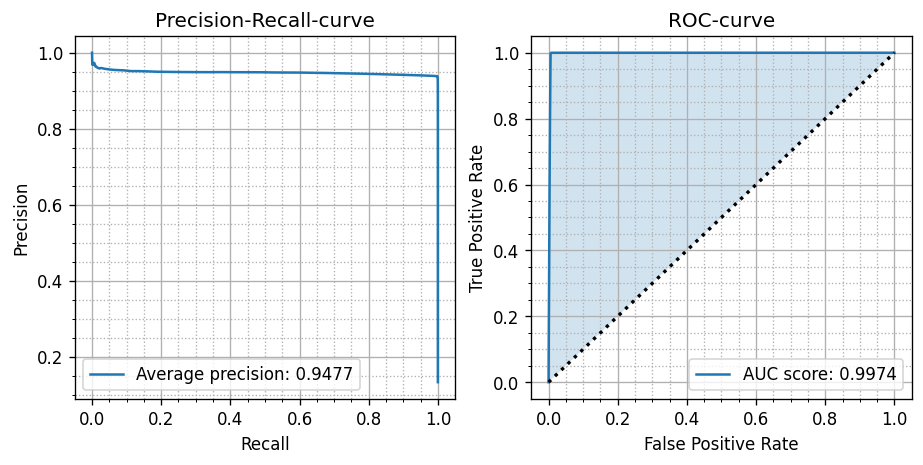

In [16]:
fig, (ax2,ax1) = plt.subplots(1,2,dpi=120,figsize=(9,4))
fpr, tpr, _ = roc_curve(y_test, y_pred)
ax1.plot(fpr, tpr, label=f"AUC score: {roc_auc_score(y_test, y_pred):.4f}")
ax1.minorticks_on()
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.plot([0,1],[0,1],color="k",linestyle=":",lw=2)
ax1.fill_between(fpr,tpr,fpr,alpha=0.2)
ax1.grid(which='major') 
ax1.grid(which='minor', linestyle=':')
ax1.legend()
ax1.set_title('ROC-curve')

prec, recall, _ = precision_recall_curve(y_test, y_pred)
ax2.plot(recall,prec, label=f"Average precision: {average_precision_score(y_test, y_pred):.4f}")
ax2.minorticks_on()
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.grid(which='major') 
ax2.grid(which='minor', linestyle=':')
ax2.legend()
ax2.set_title('Precision-Recall-curve');


In [19]:
fig.savefig("page/sources/Results_classic.jpg")

0.9490963436446076

In [21]:
%timeit Algorithms.classic_algo(data, threshold=None, cumulative=1)

3.04 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
